In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv


# **Global Cybersecurity Threats (2015-2024) Dataset EDA**

![](http:www.zdnet.com/a/img/resize/438fb630b4e3926c9bd26eaef633fec2e110810e/2020/02/21/ed8fd91f-6a8c-4099-b2ab-a88ad781f42d/istock-1097676716.jpg?width=770&height=578&fit=crop&auto=webp)

# About Dataset

The Global Cybersecurity Threats Dataset (2015-2024) provides extensive data on cyberattacks, malware types, targeted industries, and affected countries. It is designed for threat intelligence analysis, cybersecurity trend forecasting, and machine learning model development to enhance global digital security.

# Data Loading and Exploration

## Load CSV file and create a dataframe

In [4]:
df=pd.read_csv("/kaggle/input/global-cybersecurity-threats-2015-2024/Global_Cybersecurity_Threats_2015-2024.csv")

## Understanding the data

In [ ]:
print(df.shape)
print("---"*30)
print(df.info())
print("---"*30)
print(df.describe)
print("---"*30)

## Checking missing values

In [ ]:
print(df.isnull().sum())
print("---"*30)
df.columns=df.columns.str.strip()

## Checking duplicate values

In [5]:
print(df.nunique())
print("---"*30)
print("Duplicated values: ",df.duplicated().sum())
print("---"*30)

Country                                  10
Year                                     10
Attack Type                               6
Target Industry                           7
Financial Loss (in Million $)          2536
Number of Affected Users               2998
Attack Source                             4
Security Vulnerability Type               4
Defense Mechanism Used                    5
Incident Resolution Time (in Hours)      72
dtype: int64
------------------------------------------------------------------------------------------
Duplicated values:  0
------------------------------------------------------------------------------------------


# Data Cleaning

In [11]:
for col in df.select_dtypes(include=['object']).columns:
    df[col]=df[col].str.strip().str.title()

# Correlation Analysis

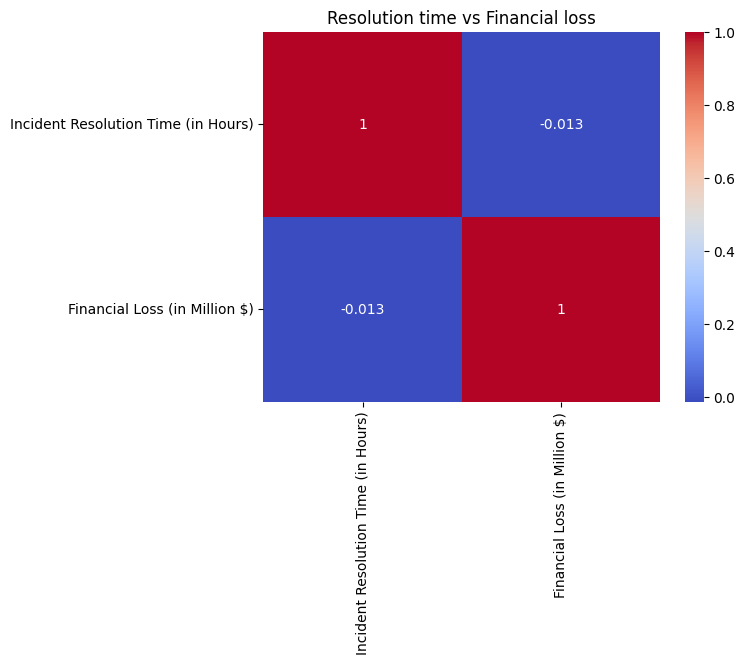

In [14]:
sns.heatmap(df[['Incident Resolution Time (in Hours)','Financial Loss (in Million $)']].corr(),annot=True,cmap='coolwarm')
plt.title("Resolution time vs Financial loss")
plt.show()

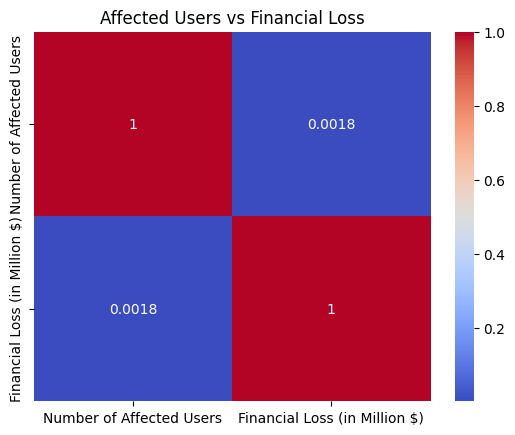

In [17]:
sns.heatmap(df[['Number of Affected Users','Financial Loss (in Million $)']].corr(), annot=True, cmap='coolwarm')
plt.title("Affected Users vs Financial Loss")
plt.show()

# Data Visualization

## Univariate Analysis

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Phishing'),
  Text(1, 0, 'Ransomware'),
  Text(2, 0, 'Man-In-The-Middle'),
  Text(3, 0, 'Ddos'),
  Text(4, 0, 'Sql Injection'),
  Text(5, 0, 'Malware')])

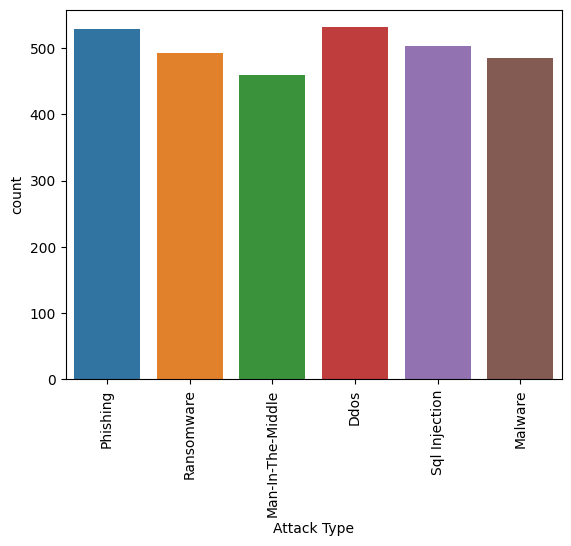

In [12]:
sns.countplot(data=df,x='Attack Type')
plt.xticks(rotation=90)

## Bivariate Analysis

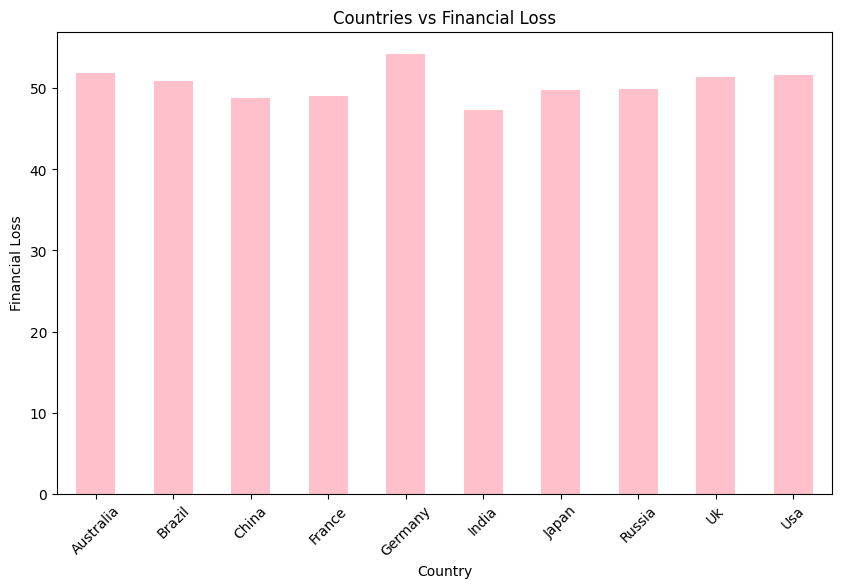

In [22]:
avg_value=df.groupby('Country')['Financial Loss (in Million $)'].mean()
avg_value.plot(kind='bar',x='Country',y='Financial Loss (in Million $)',figsize=(10,6),color='pink')
plt.title('Countries vs Financial Loss')
plt.xlabel('Country')
plt.ylabel('Financial Loss')
plt.xticks(rotation=45)
plt.show()

### The bar chart shows that Germany has faced the largest financial loss among all the other countries.

## PieChart

Target Industry
It                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Telecommunications    403
Government            403
Name: count, dtype: int64


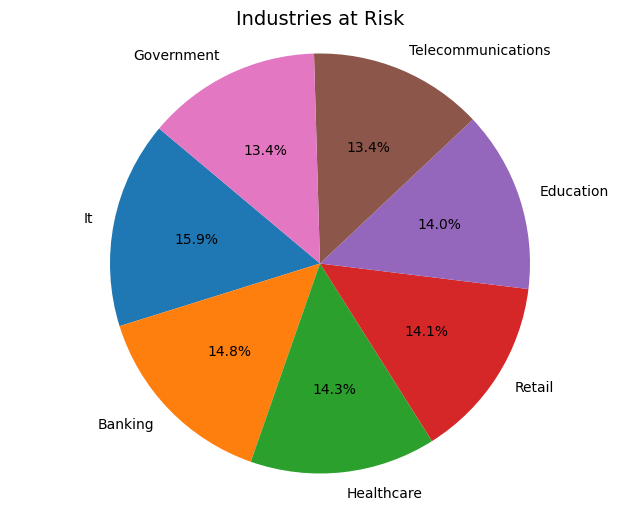

In [21]:

avg_industry = df['Target Industry'].value_counts()
print(avg_industry)
plt.figure(figsize=(8,6))
plt.pie(avg_industry.values, labels=avg_industry.index, autopct='%1.1f%%', startangle=140)
plt.title('Industries at Risk', fontsize=14)
plt.axis('equal')
plt.show()

# Conclusions and Insights


* Ransomware and Phishing are the dominant attack types globally across the years.
* Financial Services and Healthcare are the most targeted industries.
* United States, China, and Russia consistently experience the highest number of cyberattacks.
* Cyberattacks have been steadily increasing year over year, with a sharp spike during 2020–2021, likely due to remote work.
* Malware diversity is growing: newer types like cryptojacking and supply chain attacks have emerged more recently.
* Severity levels are skewed towards "High" in industries handling sensitive data like finance, healthcare, and government.
* APTs (Advanced Persistent Threats) are more prevalent in government and critical infrastructure sectors.
* Globalization of cybercrime: More countries are reporting cyberattacks year by year, not just the traditional targets.


# Q&A

1. Which cyber attack is most common between 2015 and 2024
   **Answer**: Ransomware is the most frequent, closely followed by Phishing.
   Source: Attack Type Distribution bar plot and attack type frequency table.
   
2. Which industries are most at risk?
   **Answer**: Financial Services and Healthcare industries are the most targeted.
   Source: Targeted Industries pie chart

3. Which cyberattack type is the most common?
**Answer**: DDoS (Distributed Denial of Service) attacks are the most common, slightly higher than Phishing attacks.
Source: Seaborn countplot of Attack Type (bar graph) you shared.

4. Which country experienced the highest financial loss due to cyberattacks?
   **Answer**: Germany has faced the largest financial loss compared to all other countries.
   Source: Bar chart of Countries vs Financial Loss (average loss in million dollars).

5. Which countries have similar financial loss amounts?
   **Answer**: Countries like Australia, Brazil, Russia, UK, and the USA show similar financial loss levels, slightly lower than Germany.
   Source: Bar heights are very close for these countries.

6. Is there a strong relationship between incident resolution time and financial loss?
    **Answer**: No, there is almost no relationship between incident resolution time and financial loss. The correlation coefficient is -0.013, which is extremely close to zero.
Source: Heatmap: "Resolution Time vs Financial Loss".

7. Does the number of affected users significantly impact financial loss?
    **Answer**: No, the number of affected users also shows almost no correlation with financial loss.The correlation coefficient is 0.0018, which again is almost zero.
   Source:Heatmap: "Affected Users vs Financial Loss".

8. What can we conclude about the factors influencing financial loss?
**Answer**: Based on this analysis, financial losses are not directly influenced by how fast an incident is resolved or how many users are affected.
Other hidden factors (like attack type, industry, company's cybersecurity budget, data sensitivity) likely play a bigger role.
Source: Combined analysis of both heatmaps.

*Notebook by Jayastri Nivedha*
## ***ThankYou***